In [28]:
%matplotlib inline

import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import multivariate_normal
import os
from dirichlet import simplex
from plot_utils import errorBars

os.chdir('/Users/sbittner/Documents/efn/');

"""
exp_fam = 'normal';
K_eta = 100;
M = 1000;
D_Z = 40;
flow_id = 'linear1';
L = 8;
opt_method = 'adam';
lr_order = -4;
"""
exp_fam = 'dirichlet';
D = 25;
K_eta = 100;
M = 1000;
flow_id = '25P';
L = 5;
give_inv = False;

if (give_inv):
    give_inv_str = 'giveInv_';
else:
    give_inv_str = '';

basedir = '/Users/sbittner/Documents/efn/results/Fig3/';

modelstr = 'EFN_%s_stochasticEta_%sD=%d_K=%d_M=%d_flow=%s_L=%d_rs=0/' % \
                    (exp_fam, give_inv_str, D, K_eta, M, flow_id, L);

savedir = basedir + modelstr;
fname = savedir + 'results.npz';

X = np.load(fname);
nits = X['it'];

train_R2s = X['train_R2s'];
train_KLs = X['train_KLs'];
test_R2s = X['test_R2s'];
test_KLs = X['test_KLs'];
check_diagnostic_rate = 100;
its = np.arange(nits);
fontsize = 20;


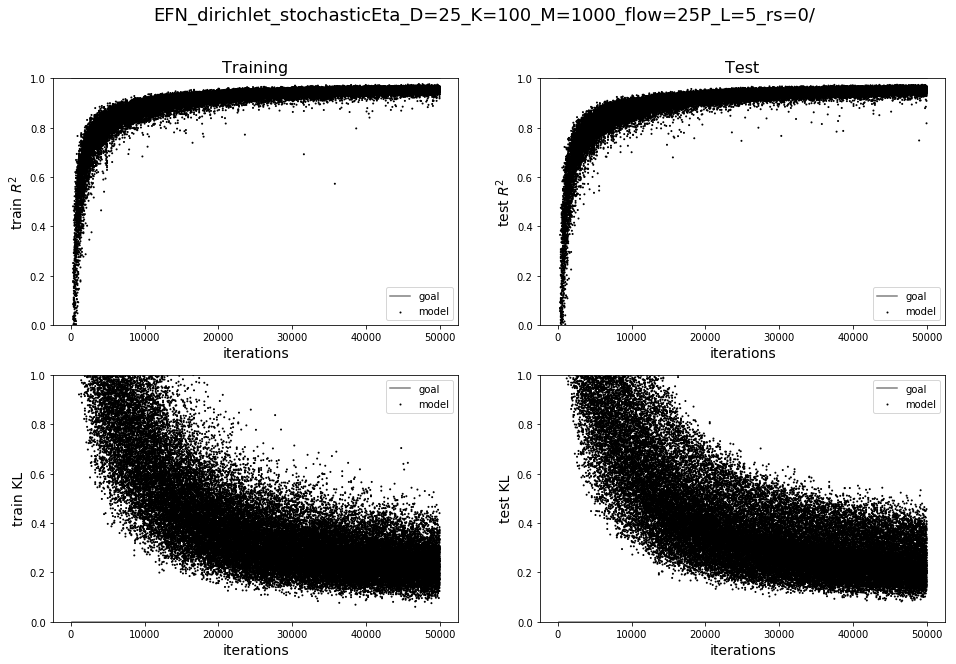

In [29]:
fontsize = 14;
N = 500;
K_eta = train_R2s.shape[1];
its = check_diagnostic_rate*np.arange(1,N+1, dtype=float);
its = np.tile(np.expand_dims(its, 1), [1,K_eta]);
its_vec = np.reshape(its, (N*K_eta,));
train_R2s_vec = np.reshape(train_R2s[:N,:], (N*K_eta,))
test_R2s_vec = np.reshape(test_R2s[:N,:], (N*K_eta,))
train_KLs_vec = np.reshape(train_KLs[:N,:], (N*K_eta,))
test_KLs_vec = np.reshape(test_KLs[:N,:], (N*K_eta,))
size = np.ones((N*K_eta,));
fig = plt.figure(figsize=(16,10));
    
fig.add_subplot(2,2,1);
plt.plot([np.min(its), np.max(its)], [1,1], 'tab:gray');
plt.scatter(its_vec, train_R2s_vec,size,c='k');
plt.legend(['goal', 'model']);
plt.xlabel('iterations', fontsize=fontsize);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('train $R^2$', fontsize=fontsize)
plt.title('Training', fontsize=fontsize+2);
plt.ylim([0,1]);
plt.suptitle(modelstr, fontsize=fontsize+4)

fig.add_subplot(2,2,2);
plt.plot([np.min(its), np.max(its)], [1,1], 'tab:gray');
plt.scatter(its_vec, test_R2s_vec,size,c='k');
plt.legend(['goal', 'model']);
plt.xlabel('iterations', fontsize=fontsize);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('test $R^2$', fontsize=fontsize)
plt.title('Test', fontsize=fontsize+2);
plt.ylim([0,1]);
    
fig.add_subplot(2,2,3);
plt.plot([np.min(its), np.max(its)], [0,0], 'tab:gray');
plt.scatter(its_vec, train_KLs_vec,size,c='k');
plt.legend(['goal', 'model']);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('train KL', fontsize=fontsize)
plt.ylim([0,1]);

fig.add_subplot(2,2,4);
plt.plot([np.min(its), np.max(its)], [0,0], 'tab:gray');
plt.scatter(its_vec, test_KLs_vec,size,c='k');
plt.legend(['goal', 'model']);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('test KL', fontsize=fontsize)
plt.ylim([0,1]);


plt.show();


In [22]:

print(train_R2s.shape);
print(N)
print('mean train R2', np.mean(train_R2s[N-1,:]))
print('mean test R2', np.mean(test_R2s[N-1,:]))

print('mean train KL', np.mean(train_KLs[N-1,:]))
print('mean test KL', np.mean(test_KLs[N-1,:]))

print('std train R2', np.std(train_R2s[N-1,:]))
print('std test R2', np.std(test_R2s[N-1,:]))

print('std train KL', np.std(train_KLs[N-1,:]))
print('std test KL', np.std(test_KLs[N-1,:]))



(1000, 100)
500
mean train R2 0.9866116613151267
mean test R2 0.9852785004149526
mean train KL nan
mean test KL nan
std train R2 0.019376880091735844
std test R2 0.015230557549275112
std train KL nan
std test KL nan


In [38]:
Z = X['X'];
eta = X['eta'];
params = X['params'][()];
D = params['D'];
alphas = params['alpha'];

print(D);
print(Z.shape);
print(eta.shape);
print(alphas.shape);

{'D': 25, 'alpha': array([[0.74115958, 2.61877607, 0.58911963, ..., 0.75424396, 1.17753822,
        2.37173728],
       [2.87651723, 1.42739769, 4.41711082, ..., 2.9850038 , 2.55373099,
        1.2500207 ],
       [4.58606833, 4.67658537, 2.73578036, ..., 2.05195364, 2.2065936 ,
        0.96336383],
       ...,
       [1.02121516, 3.30480241, 4.56758937, ..., 4.65740616, 2.49760839,
        1.1172096 ],
       [4.5056277 , 2.10456785, 2.78639194, ..., 4.12185545, 3.72098095,
        1.7294835 ],
       [2.65020361, 0.55731763, 3.26528404, ..., 4.639081  , 1.53201438,
        4.79862212]])}
25
(100, 1000, 25, 1)
(100, 25)
(100, 25)
